### Ch15 Figure3

In [2]:
# Try to imagine what this would look like on your data science team. Let's say your running shoe website ran a promotion. They sent out a coupon to everyone who bought a product. Then the data science team looked at the number of people who used the coupon to make a purchase.
# The data showed that 8% of your customers looked at the coupon. Of that 8% around 5% used the coupon before it expired. The data also shows that there was a jump in revenue on the day that the coupon was sent to your customers.

data = []

for i in range(5000):
    
    value = rd.random() * 100
    date = random_date()
    if date > pd.to_datetime('2009-03-11'):
        
        if rd.random() <= .8:
            sent_coupon = True
        else:
            sent_coupon = False

        if rd.random() <= .08:
            clicked_coupon = True
        else:
            clicked_coupon = False
        
        use_coupon = False
        
        if clicked_coupon:
            if rd.random() <= .06:
                use_coupon = True
            else:
                use_coupon = False
        if use_coupon:
            if date <= pd.to_datetime('2009-03-15'):
                value *= 2
            else:
                value *= 1.5
    else:
        sent_coupon = False
        clicked_coupon = False
        use_coupon = False            
    
    data.append([i, date, sent_coupon, clicked_coupon, use_coupon, value])

df = pd.DataFrame(data, columns=['id', 'date', 'sent_coupon', 'clicked_coupon', 'used_coupon', 'value'])
# df.to_csv('csv_output/ch15_fig3.csv', index=False)
df = pd.read_csv('csv_output/ch15_fig3.csv')
df.head()

,id,date,sent_coupon,clicked_coupon,used_coupon,value
0,0,2009-03-19 11:44:24,True,False,False,39.495121
1,1,2009-03-12 18:24:58,True,False,False,72.099893
2,2,2009-03-26 17:11:26,True,False,False,41.393954
3,3,2009-03-26 07:32:01,True,False,False,90.733180
4,4,2009-03-20 03:43:34,True,False,False,70.811921


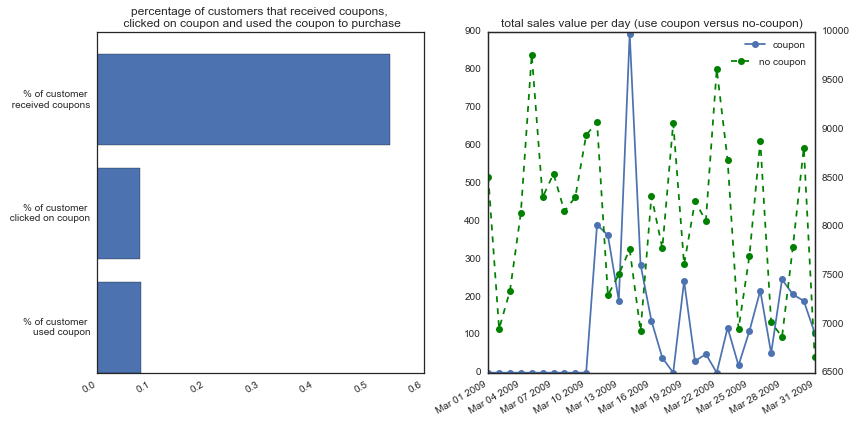

In [3]:
df = pd.read_csv('csv_output/ch15_fig3.csv')
df['date_new'] = df.date.map(lambda x: str(x)[:10])
df['date_new'] = pd.to_datetime(df.date_new)

%matplotlib inline
sns.set_style("white")

f, ax = plt.subplots(1,2, figsize=(12,6))

perc = [df['sent_coupon'].mean(), df[df.sent_coupon==True].clicked_coupon.mean(), df[df.clicked_coupon==True].used_coupon.mean()]
ax[0].barh(bottom = np.arange(3)[::-1], width = perc)
ax[0].set_title('percentage of customers that received coupons, \n clicked on coupon and used the coupon to purchase')
ax[0].set_yticks(np.arange(3)+.4);
ax[0].set_yticklabels(['% of customer \n received coupons', '% of customer \n clicked on coupon', '% of customer \nused coupon'][::-1])
# ax[0].set_xticks([]);

df2 = df.pivot_table(index='date_new', columns='used_coupon', values='value', aggfunc=np.sum).reset_index();
df2.fillna(0, inplace=True)
df2.rename(columns={True: 'Used Coupon', False: 'Did not use coupon'}, inplace=True)
ax[1].plot_date(x=df2.date_new, y=df2['Used Coupon'], fmt='o-')
ax2 = ax[1].twinx()
ax2.plot_date(x=df2.date_new, y=df2['Did not use coupon'], fmt='o--', color='green')
ax[1].legend(['coupon'])
ax2.legend(['no coupon'], bbox_to_anchor = (1,.95))

ax[1].set_title('total sales value per day (use coupon versus no-coupon)')


f.autofmt_xdate()
f.tight_layout()
f.savefig('svg_output/ch15_fig3.svg', format='svg')

The graph on the left shows around 50% of customers received coupons, among those, the second bar shows only 8% of customers who actually clicked on the coupon, among those, only 5% of people who actually used the coupon. The grph on the right shows a spike of the sales on the day the coupon was sent to customer, it did affect "no-coupon" sales but if we compare the actual number, coupon sales accounts only for 10% the total sales due to the fact that not many people actually clicked and used the coupon.